<a href="https://colab.research.google.com/github/sapoepsilon/colorizeBlackandWhite/blob/main/ColroizeDeoldify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/jantic/DeOldify.git DeOldify 

Cloning into 'DeOldify'...
remote: Enumerating objects: 2297, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 2297 (delta 33), reused 17 (delta 5), pack-reused 2228
Receiving objects: 100% (2297/2297), 69.44 MiB | 24.43 MiB/s, done.
Resolving deltas: 100% (1041/1041), done.


In [2]:
cd DeOldify

/content/DeOldify


In [3]:
#NOTE:  This must be the first call in order to work properly!
from deoldify import device
from deoldify.device_id import DeviceId
#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.GPU0)

import torch

if not torch.cuda.is_available():
    print('GPU not available.')

In [4]:
!pip install -r colab_requirements.txt

     |████████████████████████████████| 214 kB 11.0 MB/s 
     |████████████████████████████████| 129 kB 47.2 MB/s 
     |████████████████████████████████| 1.9 MB 39.1 MB/s 
     |████████████████████████████████| 78 kB 7.2 MB/s 
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26324 sha256=08491405a96dc4fcff96c6536b060134efd0a9a3ed540ef0767b678930ef1048
  Stored in directory: /root/.cache/pip/wheels/35/f3/15/01aa6571f0a72ee6ae7b827c1491c37a1f72d686fd22b43b0e
Successfully built typing
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [5]:
import fastai
from deoldify.visualize import *

torch.backends.cudnn.benchmark = True

In [6]:
!mkdir 'models'
!wget https://www.dropbox.com/s/usf7uifrctqw9rl/ColorizeStable_gen.pth?dl=0 -O ./models/ColorizeStable_gen.pth

--2021-11-09 23:11:35--  https://www.dropbox.com/s/usf7uifrctqw9rl/ColorizeStable_gen.pth?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.68.18, 2620:100:6023:18::a27d:4312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.68.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/usf7uifrctqw9rl/ColorizeStable_gen.pth [following]
--2021-11-09 23:11:35--  https://www.dropbox.com/s/raw/usf7uifrctqw9rl/ColorizeStable_gen.pth
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc023f4bdc1866710c0b58c3785f.dl.dropboxusercontent.com/cd/0/inline/BZoCHErnPOnmhU6qkkxKRx9Mfbnm_MiCFxSiLQWlvwl20vaRuFo4_Ve4tGx7EfMahQQVS73q-KwAMV0ZKTNpG1hYFnHqSJxrzKghtg7Q5wDHCRpbcMK7x4WT9PpBGzBNa-eX07jdfyxqckAgzf5qkyJ6/file# [following]
--2021-11-09 23:11:36--  https://uc023f4bdc1866710c0b58c3785f.dl.dropboxusercontent.com/cd/0/inline/BZoCHErnPOnmhU6qkkxKRx9Mfbnm_MiCFxSiLQWlvwl20vaRuFo4

In [7]:
!wget https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png -O ./resource_images/watermark.png

--2021-11-09 23:12:27--  https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9210 (9.0K) [image/png]
Saving to: ‘./resource_images/watermark.png’

./resource_images/w 100%[===================>]   8.99K  --.-KB/s    in 0s      

2021-11-09 23:12:27 (40.7 MB/s) - ‘./resource_images/watermark.png’ saved [9210/9210]



In [8]:
colorizer = get_image_colorizer(artistic=False)

/usr/local/lib/python3.7/dist-packages/fastai/data_block.py:442: UserWarning: Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.
  warn("Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.")
/usr/local/lib/python3.7/dist-packages/fastai/data_block.py:445: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential s

  0%|          | 0.00/171M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


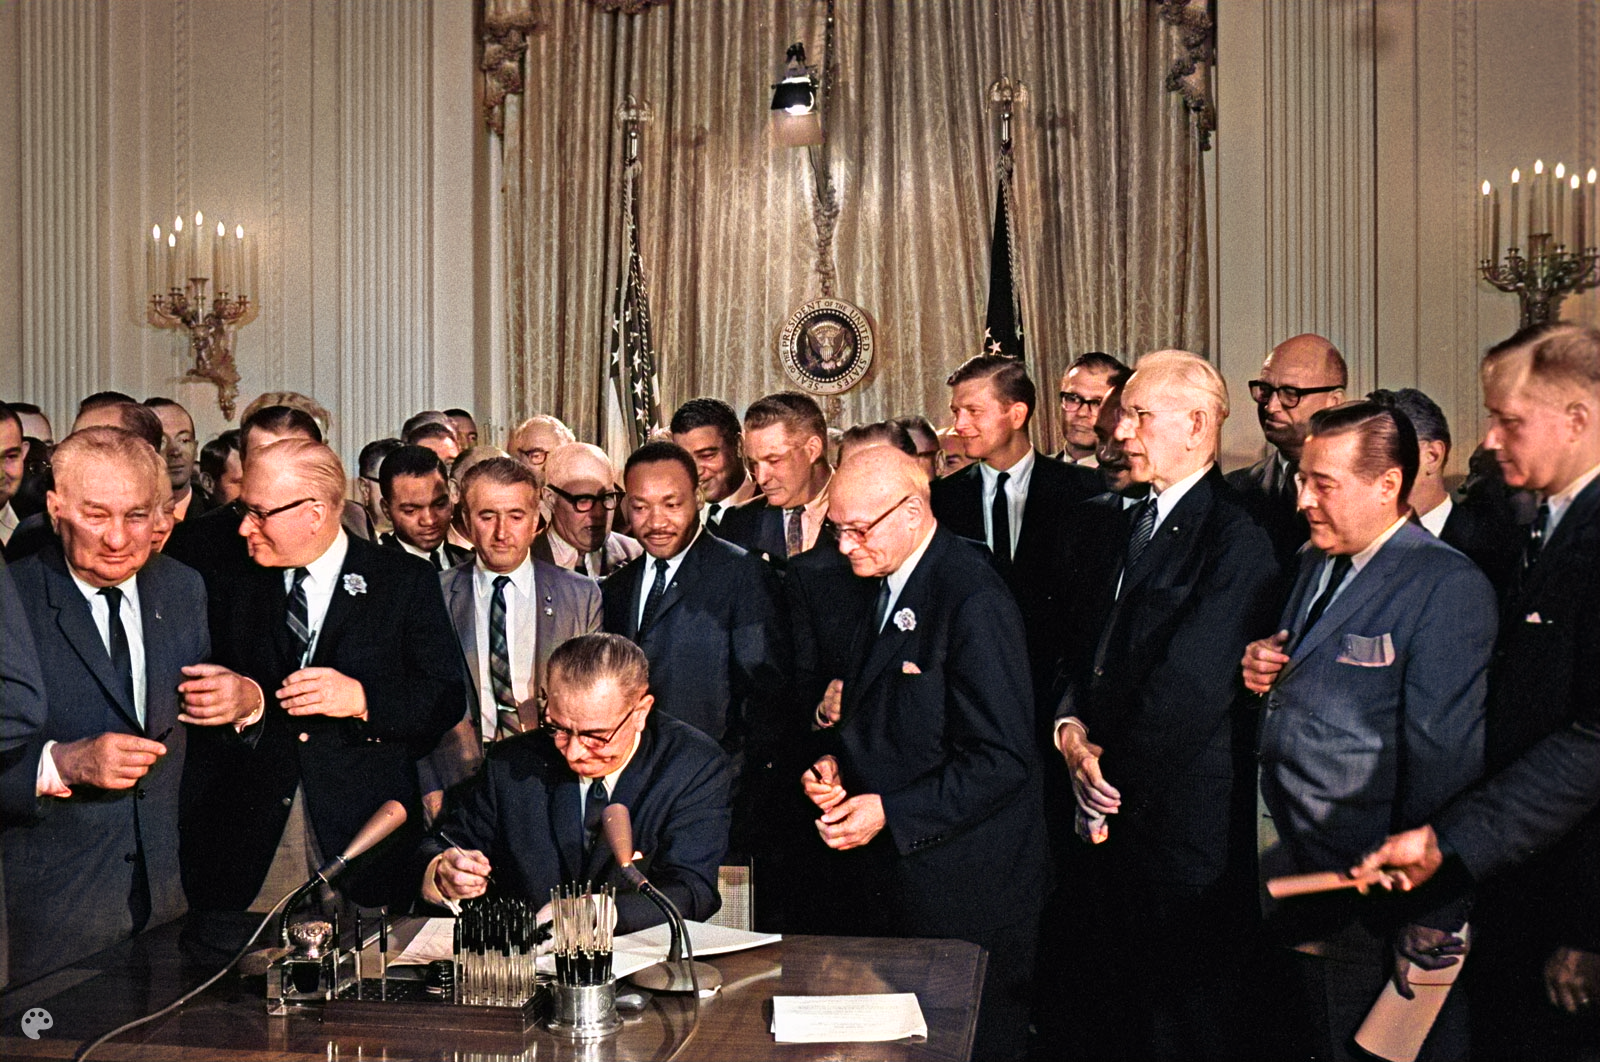

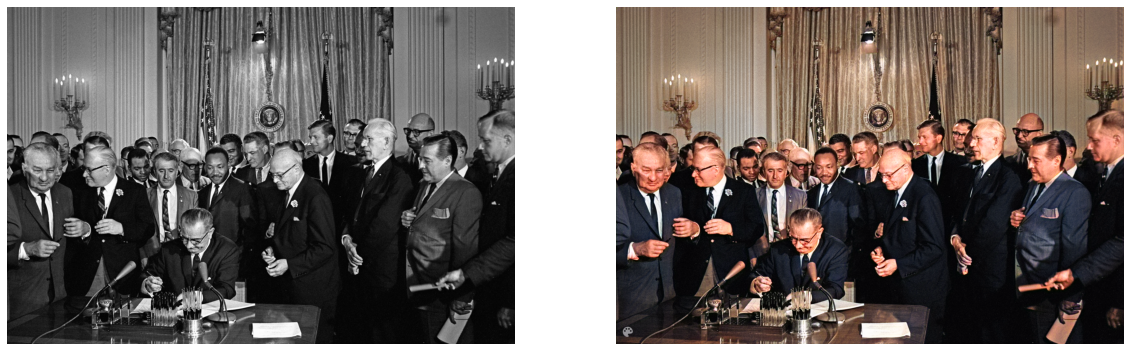

In [9]:
  source_url = 'https://cdn.britannica.com/88/136088-050-17171BF5/Pres-Lyndon-B-Johnson-others-Martin-Luther-July-2-1964.jpg' #@param {type:"string"}
  render_factor = 39  #@param {type: "slider", min: 7, max: 40}
  watermarked = True #@param {type:"boolean"}

  if source_url is not None and source_url !='':
      image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermarked)
      show_image_in_notebook(image_path)
  else:
      print('Provide an image url and try again.')